In [ ]:
#importing all the libraries needed here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Reading the dataset from my google drive
data_path = '/content/drive/MyDrive/text001 machine learning/milknew.csv'
df = pd.read_csv(data_path)

In [ ]:

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check for outliers
print(df.describe())
print()

# Check for class imbalance
print(df['Grade'].value_counts())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64
976
                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000

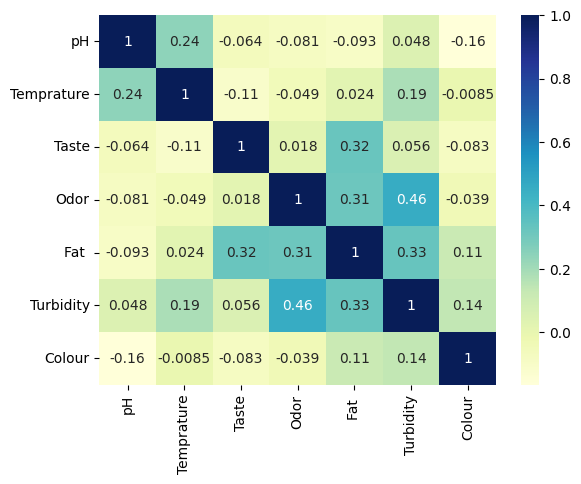

In [ ]:
# heat map graph
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.show()


<Axes: xlabel='pH', ylabel='Temprature'>

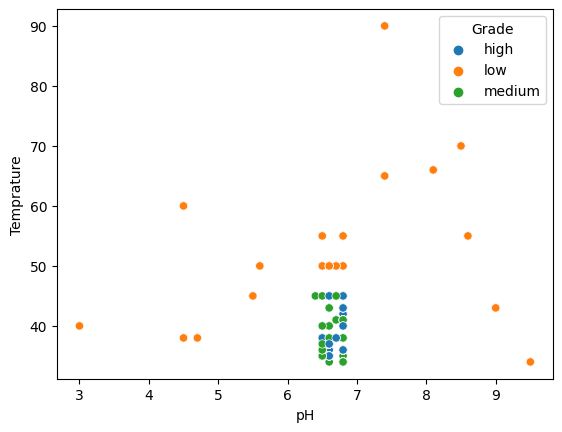

In [ ]:
#data distribution graph
sns.scatterplot(x='pH', y='Temprature', hue='Grade', data=df)


In [ ]:
#spliting the data into x and y and dropping the grade column from x ,which we want to predict
X = df.drop('Grade', axis=1)
y = df['Grade']



In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# sclaing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# so it is more clear
rfc = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=500)

In [ ]:
#training the data onRandom Forest

rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# training the data on  Decision Tree
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#training the data on Multilayer Perceptron
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

Random Forest
Accuracy: 0.9952830188679245
Precision: 0.9953792837889873
Recall: 0.9952830188679245
F1 score: 0.9952921171354889



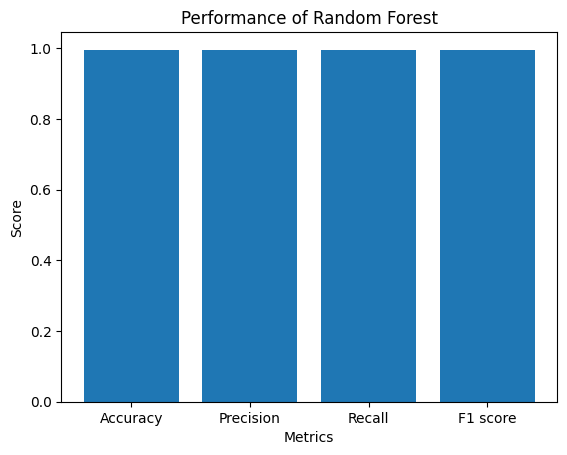

Decision Tree
Accuracy: 0.9905660377358491
Precision: 0.9906202559097809
Recall: 0.9905660377358491
F1 score: 0.9905644545611264



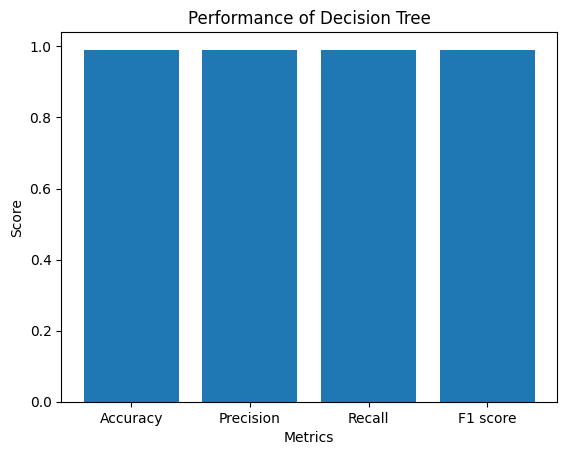

Multilayer Perceptron (MLP)
Accuracy: 0.9952830188679245
Precision: 0.9953372370418564
Recall: 0.9952830188679245
F1 score: 0.9952814356932018



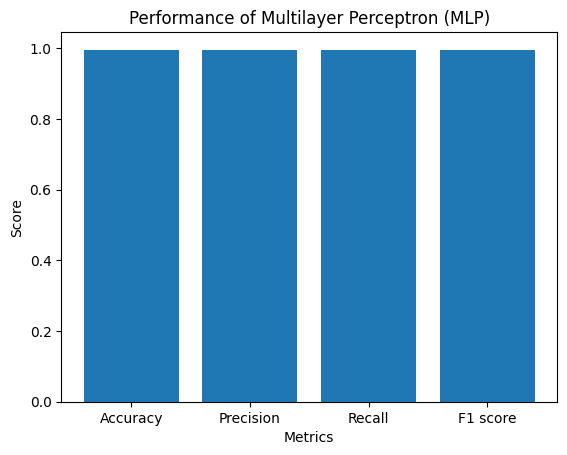

In [ ]:
# here we compare the result and do the tests
models = [rfc,dt,mlp]
model_names = ['Random Forest','Decision Tree','Multilayer Perceptron (MLP)']
for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(model_names[i])
    print('Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    print()
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    scores = [acc, precision, recall, f1]
    plt.bar(metrics, scores)
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Performance of '+model_names[i])
    plt.show()


